In [14]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import plotly as plt
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("C:\\Users\\ashwa\\Desktop\covid_19_data.csv")

In [22]:
timeseries=df["Confirmed"]

In [6]:
print("p-value:", adfuller(timeseries))

KeyboardInterrupt: 

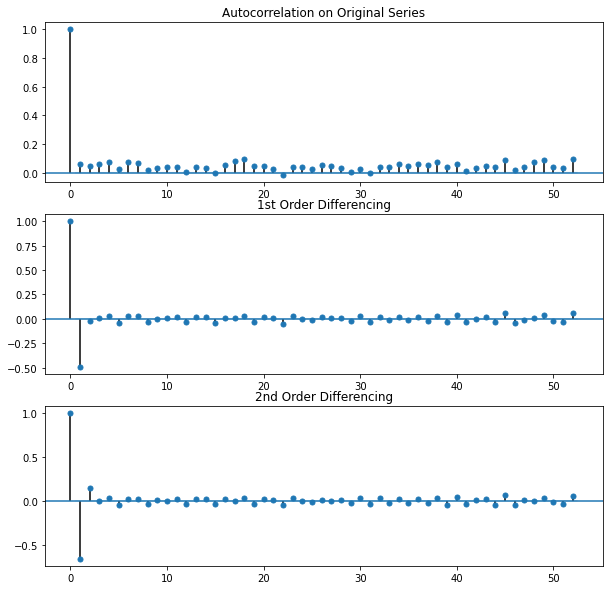

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(timeseries, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(timeseries.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(timeseries.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")


In [9]:
import plotly as plt

In [11]:
import matplotlib.pyplot as plt

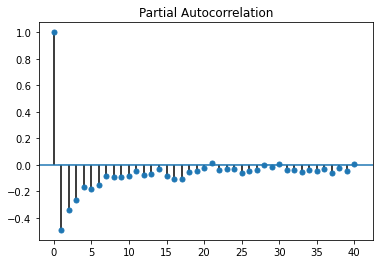

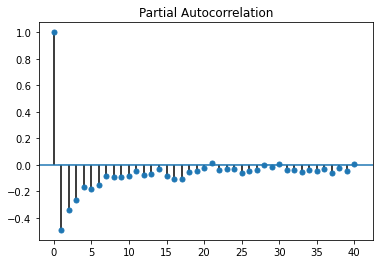

In [24]:
plot_pacf(timeseries.diff().dropna(), lags=40)

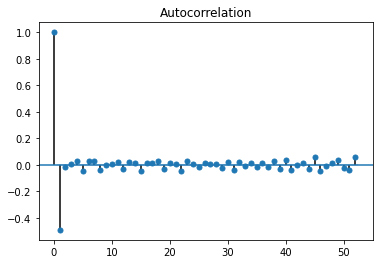

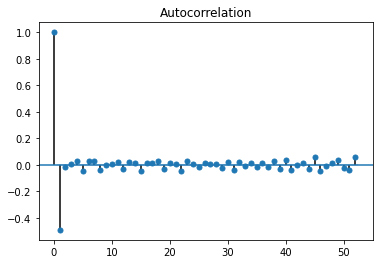

In [25]:
plot_acf(timeseries.diff().dropna())

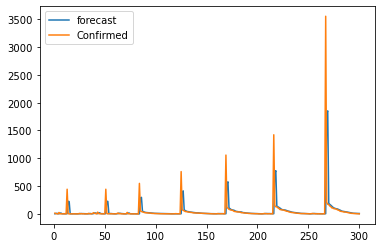

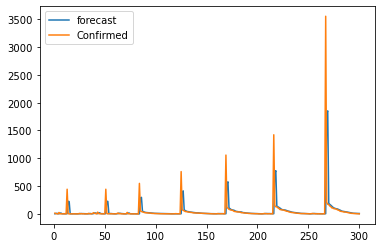

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(timeseries, order=(1,1,0))
results = model.fit()
results.plot_predict(1, 300)

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Recovered   No. Observations:               156291
Model:                 ARIMA(1, 1, 0)   Log Likelihood            -2047861.627
Method:                       css-mle   S.D. of innovations         118650.422
Date:                Tue, 24 Nov 2020   AIC                        4095729.254
Time:                        13:38:27   BIC                        4095759.133
Sample:                             1   HQIC                       4095738.143
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.214e-06    201.898  -6.01e-09      1.000    -395.713     395.713
ar.L1.D.Recovered    -0.4865      0.002   -220.153      0.000      -0.491      -0.482
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0554           +0.0000j            2.0554            0.5000
-----------------------------------------------------------------------------
"""

In [22]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel

In [23]:
import pmdarima as pm

In [24]:
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, 
                                    return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1], 
                           periods=n_periods, freq="W")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(timeseries.name)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", 
                     alpha=0.25)
    plt.legend(("past", "forecast", "95% confidence interval"),  
               loc="upper left")
    plt.show()

In [28]:
automodel = arimamodel(df["Recovered"])
plotarima(70, df["Recovered"], automodel)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=28.97 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4041528.685, Time=1.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4040688.974, Time=1.52 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4040756.398, Time=2.72 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4040399.423, Time=2.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4040225.183, Time=2.72 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4039726.264, Time=3.23 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4039306.893, Time=3.81 sec


C:\Users\ashwa\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=103.21 sec


KeyboardInterrupt: 